# DeDop L1B Explorer

Resources:
* http://matplotlib.org/users/image_tutorial.html
* http://ipywidgets.readthedocs.io/en/latest/

In [8]:
from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.basemap import Basemap
import numpy as np
from ipywidgets import interact
%matplotlib inline

In [9]:
file = "D:\\EOData\\DeDop\\L1B.nc"
ds = Dataset(file)

In [10]:
lat = ds['lat_l1b_echo_sar_ku'][:]
lat.min(), lat.max()

(3.97925, 6.9323030000000001)

In [11]:
lon = ds['lon_l1b_echo_sar_ku'][:] - 180
lon.min(), lon.max()

(63.214408999999989, 63.872471999999988)

In [12]:
time_var = ds['time_l1b_echo_sar_ku']
time = num2date(time_var[:], time_var.units, calendar=time_var.calendar)
time.min(), time.max()

(datetime.datetime(2013, 4, 15, 5, 42, 7, 215659),
 datetime.datetime(2013, 4, 15, 5, 42, 57, 179189))

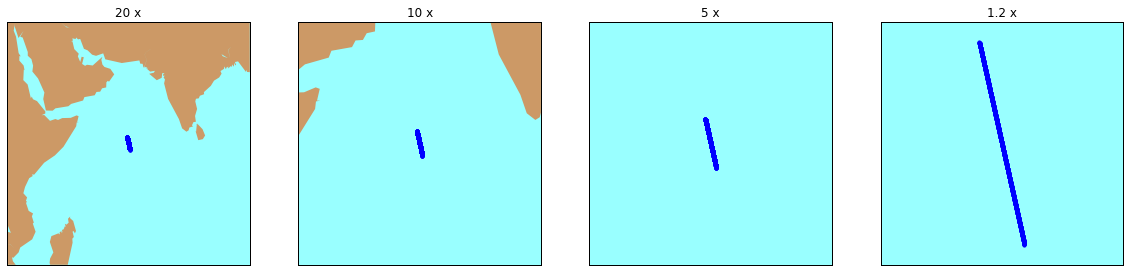

In [13]:
lat_0 = lat.mean()
lon_0 = lon.mean()

m = Basemap(projection='tmerc', lat_0=lat_0, lon_0=lon_0, width=10000, height=10000)
x, y = m(lon, lat)
size = max(x.max() - x.min(), y.max() - y.min())
scales = [20, 10, 5, 1.2]
fig, axes = plt.subplots(nrows=1, ncols=len(scales), figsize=(20, 20))
for axis, scale in zip(axes, scales):
    width = scale * size
    height = scale * size
    m = Basemap(ax=axis, projection='tmerc', lat_0=lat_0, lon_0=lon_0, width=width, height=height)
    x, y = m(lon, lat)
    m.drawmapboundary(fill_color='#99ffff')
    m.fillcontinents(color='#cc9966', lake_color='#99ffff')
    m.scatter(x, y, s=10, marker='o', color='blue')
    axis.set_title('%s x' % scale, fontsize=12)
plt.show()

In [14]:
i2q2_meas_ku = ds['i2q2_meas_ku_l1b_echo_sar_ku'][:]
i2q2_meas_ku.shape

(1021, 128)

In [15]:
scale_factor_ku = ds['scale_factor_ku_l1b_echo_sar_ku'][:]
scale_factor_ku = scale_factor_ku.reshape(scale_factor_ku.shape + (1,))
scale_factor_ku.shape

(1021, 1)

In [16]:
i2q2_meas_ku *= scale_factor_ku
i2q2_meas_ku.shape

(1021, 128)

In [17]:
i2q2_meas_ku.min(), i2q2_meas_ku.max()

(1205.3677999999998, 30087273.237540003)

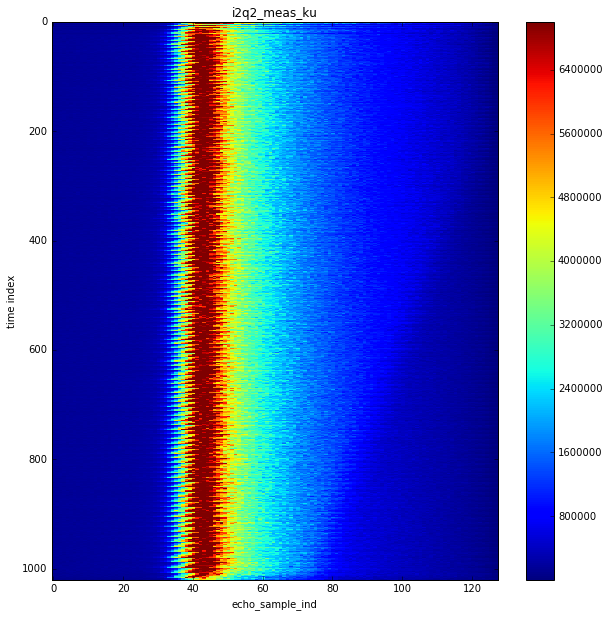

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(i2q2_meas_ku, interpolation='nearest', aspect='auto', vmin=1200, vmax=7000000)
plt.xlabel('echo_sample_ind')
plt.ylabel('time index')
plt.title('i2q2_meas_ku')
plt.colorbar(orientation='vertical')

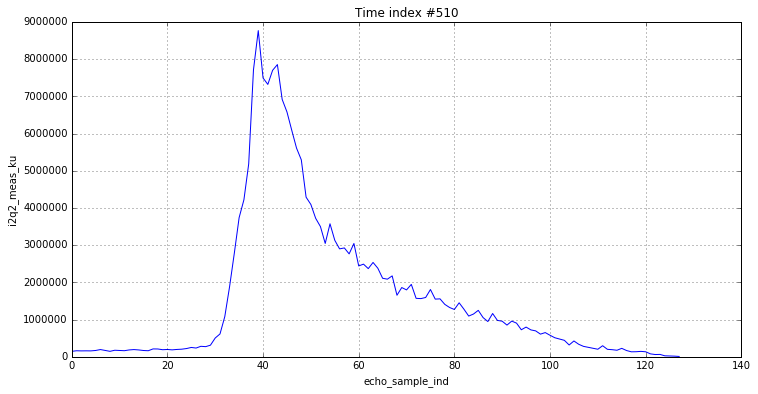

<function __main__.plot_i2q2_meas_ku>

In [19]:
num_times = i2q2_meas_ku.shape[0]
num_samples = i2q2_meas_ku.shape[1]
echo_sample_ind = np.arange(0, num_samples)


def plot_i2q2_meas_ku(time_index):
    plt.figure(figsize=(12,6))
    plt.plot(echo_sample_ind, i2q2_meas_ku[time_index])
    plt.xlabel('echo_sample_ind')
    plt.ylabel('i2q2_meas_ku')
    plt.title('Time index #%s' % time_index)
    plt.grid(True)
    #plt.savefig("test.png")
    plt.show()
    
interact(plot_i2q2_meas_ku, time_index=(0, num_times-1))